<a href="https://colab.research.google.com/github/GuilhermeHermes/Analise-de-Dados-Nacionais-de-Seguran-a-P-blica-SINESP/blob/main/IMG_TESTS_AUTOMATIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U google-generativeai

In [ ]:


import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
from google.colab import userdata

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [ ]:
import os

image_folder = '/content'

image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('jpg', 'jpeg', 'png'))]

print(f"Found {len(image_files)} images.")

Found 10 images.


In [ ]:
def generate_description(image):
    try:
        response = model.generate_content(["Please describe the image below in as much detail as possible. Include information about the colors, shapes, people, objects, scenery, and any action taking place in the image. If possible, comment on the feeling the image conveys", image], stream=True)
        response.resolve()
        return response.text
    except Exception as e:
        print(f"Failed to generate description: {e}")
        return None

In [ ]:
from PIL import Image

def show_image_and_result(image, result, max_width=200):
    ANTIALIAS = Image.Resampling.LANCZOS if hasattr(Image, "Resampling") else Image.ANTIALIAS
    # Calcula a proporção para redimensionar a imagem mantendo sua relação de aspecto
    width_percent = (max_width / float(image.size[0]))
    height_size = int((float(image.size[1]) * float(width_percent)))

    # Redimensiona a imagem
    image = image.resize((max_width, height_size), ANTIALIAS)

    # Exibe a imagem e o resultado
    display(image)
    print(result)


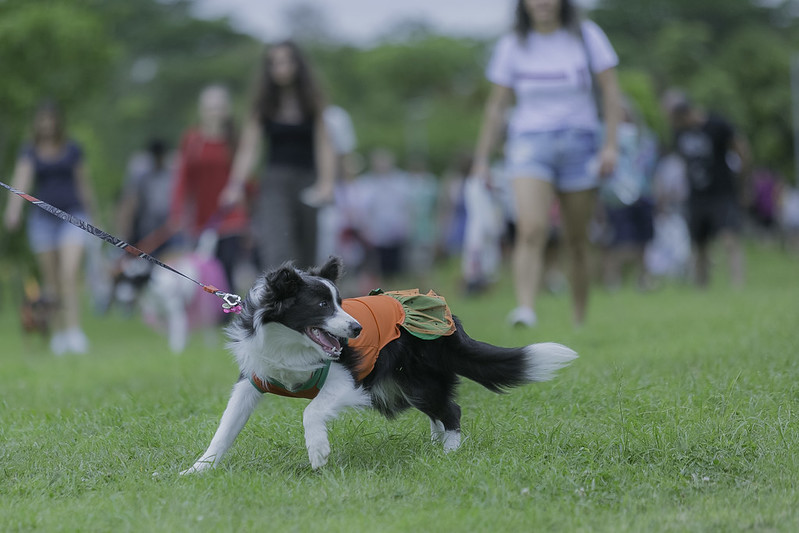

In [ ]:
import PIL.Image


# Abrindo a imagem usando o caminho contido em image_files[0]
img = PIL.Image.open(image_files[0])
img

In [ ]:
response = model.generate_content(["Please describe the image below in as much detail as possible. Include information about the colors, shapes, people, objects, scenery, and any action taking place in the image. If possible, comment on the feeling the image conveys", img], stream=True)
response.resolve()
to_markdown(response.text)

> The image shows a black and white Border Collie dog wearing an orange and green vest running towards the right side of the image. It is on a leash that is attached to a collar with a pink buckle. The dog's tongue is sticking out slightly and its tail is wagging. The dog is in a grassy field, and there is a blurry background of people walking in the park. The people are mostly out of focus but a few are in the foreground.  The person closest to the camera is a woman wearing a white shirt and denim shorts. The colors in the image are mostly green, white, and black. The image conveys a sense of energy, excitement, and joy. The dog is clearly happy to be running around and having fun. 


In [ ]:
response.text

"The image shows a black and white Border Collie dog wearing an orange and green vest running towards the right side of the image. It is on a leash that is attached to a collar with a pink buckle. The dog's tongue is sticking out slightly and its tail is wagging. The dog is in a grassy field, and there is a blurry background of people walking in the park. The people are mostly out of focus but a few are in the foreground.  The person closest to the camera is a woman wearing a white shirt and denim shorts. The colors in the image are mostly green, white, and black. The image conveys a sense of energy, excitement, and joy. The dog is clearly happy to be running around and having fun. \n"

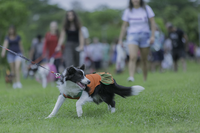

The image shows a black and white Border Collie dog wearing an orange and green vest running towards the right side of the image. It is on a leash that is attached to a collar with a pink buckle. The dog's tongue is sticking out slightly and its tail is wagging. The dog is in a grassy field, and there is a blurry background of people walking in the park. The people are mostly out of focus but a few are in the foreground.  The person closest to the camera is a woman wearing a white shirt and denim shorts. The colors in the image are mostly green, white, and black. The image conveys a sense of energy, excitement, and joy. The dog is clearly happy to be running around and having fun. 



In [ ]:
show_image_and_result(img, response.text)

/content/img_008.jpg


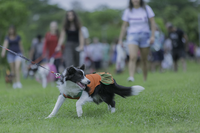

The image shows a black and white border collie dog wearing an orange vest and a green and brown ruffle. The dog is running across a grassy field towards the left of the image. A black leash is attached to the dog's collar and extends towards the top left of the image. The dog's tongue is sticking out, and it appears to be excited. The dog is in focus, while the background is blurred.  Behind the dog are several people, mostly out of focus. The people are walking in the park on a sunny day.  The scene is dominated by green grass and blue sky, which conveys a feeling of joy and freedom. The dog's happy expression and the sunny weather contribute to a positive and cheerful feeling.  

/content/img_003.jpg


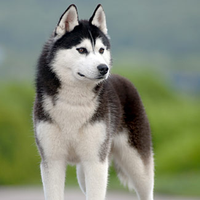

The image shows a black and white Siberian Husky standing on a blurred background of green grass and a blue-grey sky. The husky is looking off to the side with a calm and alert expression. Its fur is thick and fluffy, with black markings on its head, back, and tail. The husky's eyes are bright blue, and its nose is black. Its body is lean and muscular, and its paws are set firmly on the ground. The image conveys a sense of strength, loyalty, and intelligence. It is a beautiful and captivating portrait of a majestic breed. 

/content/img_006.jpg


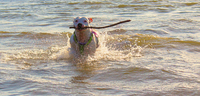

The image shows a white dog with brown spots swimming in a body of water. The dog is facing the viewer and has a stick in its mouth. The dog is wearing a green and purple life vest. The water is a light brown color and there are waves and ripples on the surface. The sun is shining on the water, creating a sparkle effect. The dog is moving forward in the water, creating a splash. The image evokes a feeling of joy and fun. The dog appears to be having a great time.
/content/img_007.jpg


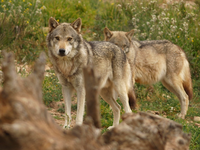

The image shows two gray wolves in a grassy field. The wolf in the foreground is in sharp focus and is looking directly at the viewer. Its fur is a mixture of gray, brown, and white, and its eyes are dark brown. The wolf's ears are pointed, and its tail is curled behind its legs. The wolf is standing on a path in the field, and there are green plants and some white flowers behind it. The second wolf is blurred and out of focus, and is standing behind the first wolf. It is looking to the left of the frame. Its fur is also a mixture of gray, brown, and white. There is a large, brown rock in the foreground, which partially obscures the wolves' bodies. The image conveys a sense of mystery and wildness. The wolves' piercing gaze and the blur of the background suggest that they are in a dangerous and unpredictable environment. The overall feeling of the image is one of tension and anticipation.
/content/img_002.jpg


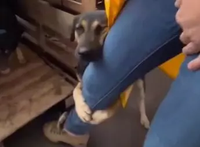

The image shows a medium-sized, brown and black dog sitting on the floor, hugging the leg of a person wearing blue jeans. The dog's front paws are wrapped around the person's leg, and the dog's head is resting on the person's thigh. The dog's eyes are closed and it appears to be asleep. The person is wearing a yellow jacket, and their hand is resting on the dog's back. The background of the image is blurry and indistinct, but it appears to be a public space, possibly a bus or train station. The overall feeling of the image is one of comfort and love. The dog appears to be deeply relaxed and happy, and the person's gentle hand on the dog's back suggests that they are also feeling a sense of peace and affection. 

/content/img_004.jpg


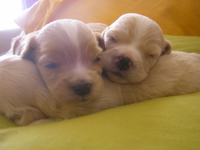

The image shows two puppies sleeping on a yellow blanket. The puppies are both white and have their eyes closed. The puppy in the foreground is lying on its side with its head resting on the other puppy's back. The puppy in the background is lying on its back with its paws curled up underneath it. The puppies' fur is soft and fluffy, and they look very peaceful. The image is soft and warm, and it evokes feelings of comfort and contentment. The yellow blanket and the soft lighting create a sense of warmth and security. The image is a perfect example of the innocence and beauty of young animals. 

/content/img_010.jpg


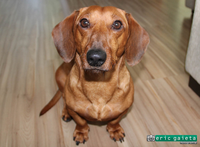

The image shows a dachshund sitting on a wooden floor. The dog is looking directly at the camera. The dachshund has short, brown fur and a long, thin body. Its ears are large and floppy and its eyes are dark brown. The dog's nose is black and wet and its tail is curled around its body.  The dog's fur is slightly darker on its back than its belly. The wooden floor is light brown and has a natural grain pattern. The image is in focus, and the dog is the main subject. The image conveys a feeling of cuteness and affection. The dog's  eyes appear to be focused on the camera with a look of mild curiosity or anticipation. 

/content/img_005.jpg


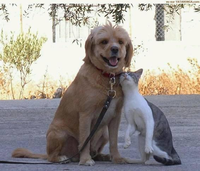

The image shows a golden-brown dog with a black leather leash sitting beside a grey and white cat. The dog's fur is soft and fluffy, and its eyes are closed. It is smiling, its tongue slightly sticking out. It has a red collar around its neck with a silver tag. The cat is sitting with its eyes closed and head tilted to the side, also smiling. It has a white body with grey stripes on its back and tail. The dog is slightly larger than the cat, and its head is resting on the cat's back. The scene takes place in an outdoor setting. The ground is a concrete path, and there is foliage and a fence in the background. The colors in the image are mostly muted and natural, with the golden fur of the dog being the brightest color. The image conveys a sense of warmth, friendship, and love.  The two animals appear to be very comfortable with each other. The expressions on their faces suggest that they are enjoying each other's company. The scene is peaceful and serene. 

/content/img_009.jpg


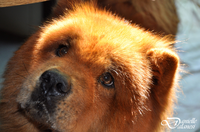

The image is a close-up portrait of a reddish-brown dog. The dog's fur is very soft and fluffy, and it is lit from the top right, casting a warm glow on the fur. The dog's face is slightly tilted to the left, and its eyes are closed, as if it is sleeping or relaxing. The dog's nose is large and black, and it has a small, pink tongue peeking out from the corner of its mouth. The dog's ears are small and floppy, and they are covered in the same soft, reddish-brown fur. 

The background of the image is blurred, but it appears to be a light, neutral color. The dog is the only subject in the image, and it is positioned in the center of the frame. 

The image conveys a feeling of calmness and peace. The dog's relaxed expression and the warm lighting create a soothing atmosphere. The image is a beautiful portrayal of a dog's serene and peaceful nature. 

/content/img_001.jpg


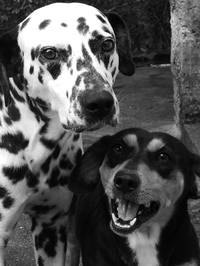

The image is a black and white close-up shot of two dogs. The dog in the foreground is a black and brown mixed breed dog with its mouth open and teeth showing. It is looking directly at the viewer and appears to be smiling. The dog in the background is a Dalmatian with black spots on a white coat. Its head is tilted slightly to the side, and it is looking towards the left of the image. Both dogs appear to be in good health and well cared for. The image gives the impression of companionship and happiness. The grainy texture of the photo suggests it may have been taken with an older camera.  The background is out of focus and shows a blurred image of what appears to be pavement or dirt. There are also hints of grassy areas and a blurry tree trunk in the background. The image is lit from the front, casting soft shadows on the dogs' faces.  The overall feeling of the image is one of love, friendship, and happiness. 



In [ ]:
for image_path in image_files:

    img = PIL.Image.open(image_path)

    description = generate_description(img)
    print(image_path)
    show_image_and_result(img, description)

ALGORITMO PRA NOMEAR AS IMAGENS DE MANEIRA CORRETA

In [ ]:
import os

def renomear_imagens(diretorio):

    arquivos = sorted(os.listdir(diretorio))


    imagens = [arquivo for arquivo in arquivos if arquivo.lower().endswith(('.png', '.jpg', '.jpeg'))]


    for i, imagem in enumerate(imagens, start=36):
        extensao = os.path.splitext(imagem)[1]
        novo_nome = f"img_{i:03}{extensao}"
        caminho_antigo = os.path.join(diretorio, imagem)
        caminho_novo = os.path.join(diretorio, novo_nome)
        os.rename(caminho_antigo, caminho_novo)
        print(f'Renomeado: {imagem} -> {novo_nome}')


diretorio = ''
renomear_imagens(diretorio)
